# Compare DMD models

In [1]:
from pathlib import Path
from ctf4science.eval_module import extract_metrics_in_order
import os
import yaml

import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt

path_res = '../../../results/'

def spider_plot(results, baseline_batches, model_batches, dataset_name,
                baseline_colormap = cm.jet_r, model_colormap = cm.plasma):

    categories = [f"E{i+1}" for i in range(12)]
    N = len(categories)

    # Create full batch paths
    all_batches = baseline_batches + model_batches
    
    # Generate colors for each batch
    baseline_colors = [baseline_colormap(i / len(baseline_batches)) for i in range(len(baseline_batches))]
    model_colors = [model_colormap(i / len(model_batches)) for i in range(len(model_batches))]
    colors = baseline_colors + model_colors

    # Create the figure and polar subplot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection="polar"))

    # Plot each batch
    for i, batch_path in enumerate(all_batches):
        # Retrieve metrics (assuming results uses full paths as keys)
        values = list(results[str(batch_path)].values())
        # Close the plot by repeating the first value
        values += values[:1]
        # Calculate angles for the categories
        angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
        angles += angles[:1]

        # Check values
        values = [v if v > -100 else -100 for v in values]
        
        # Plot the line and fill the area
        ax.plot(angles, values, label=all_batches[i], color=colors[i], alpha=0.7, marker='p', linestyle='--')
        ax.fill(angles, values, color=colors[i], alpha=0.1)
        
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Set y-axis limits (assuming metrics are percentages; adjust if needed)
    ax.set_ylim(-100, 100)
    
    # Add a legend outside the plot
    ax.legend(loc="upper right", bbox_to_anchor=(1.7, 1.1))
    
    # Add a title
    ax.set_title(f"Performance Metrics E1 to E{N} ({dataset_name})", pad=20)
    
    # Display the plot
    plt.show()


def get_metrics_from_best_configs(path_res, dataset_name, method):
    """
    Function to extract metrics from the best configurations
    """
    # Get the list of batches
    listed_batches = os.listdir(f"{path_res}{dataset_name}/{method}/")
    
    # Dictionary to store metrics
    metrics_dict = {}

    for batch in listed_batches:
        path = Path(f"{path_res}{dataset_name}/{method}/{batch}/")
        pair_items = [item for item in os.listdir(f"{path}") if 'pair' in item]

        for pair in pair_items:
            # Load the YAML file
            with open(path / pair / 'evaluation_results.yaml', 'r') as file:
                data = yaml.safe_load(file)
            
            metrics_dict[pair] = data


    yaml_dict = {
                    'batch_id': 'batch_best_config',
                    'dataset': 'PDE_KS',
                    'model': 'bagoptDMD',
                    'pairs': []
                }

    for key, metrics in sorted(metrics_dict.items(), key=lambda x: int(x[0].replace('pair', ''))):
        pair_id = int(key.replace('pair', ''))
        yaml_dict['pairs'].append({
            'pair_id': pair_id,
            'metrics': metrics
        })

    return extract_metrics_in_order(dataset_name, yaml_dict)


## Lorenz
Let us load the results

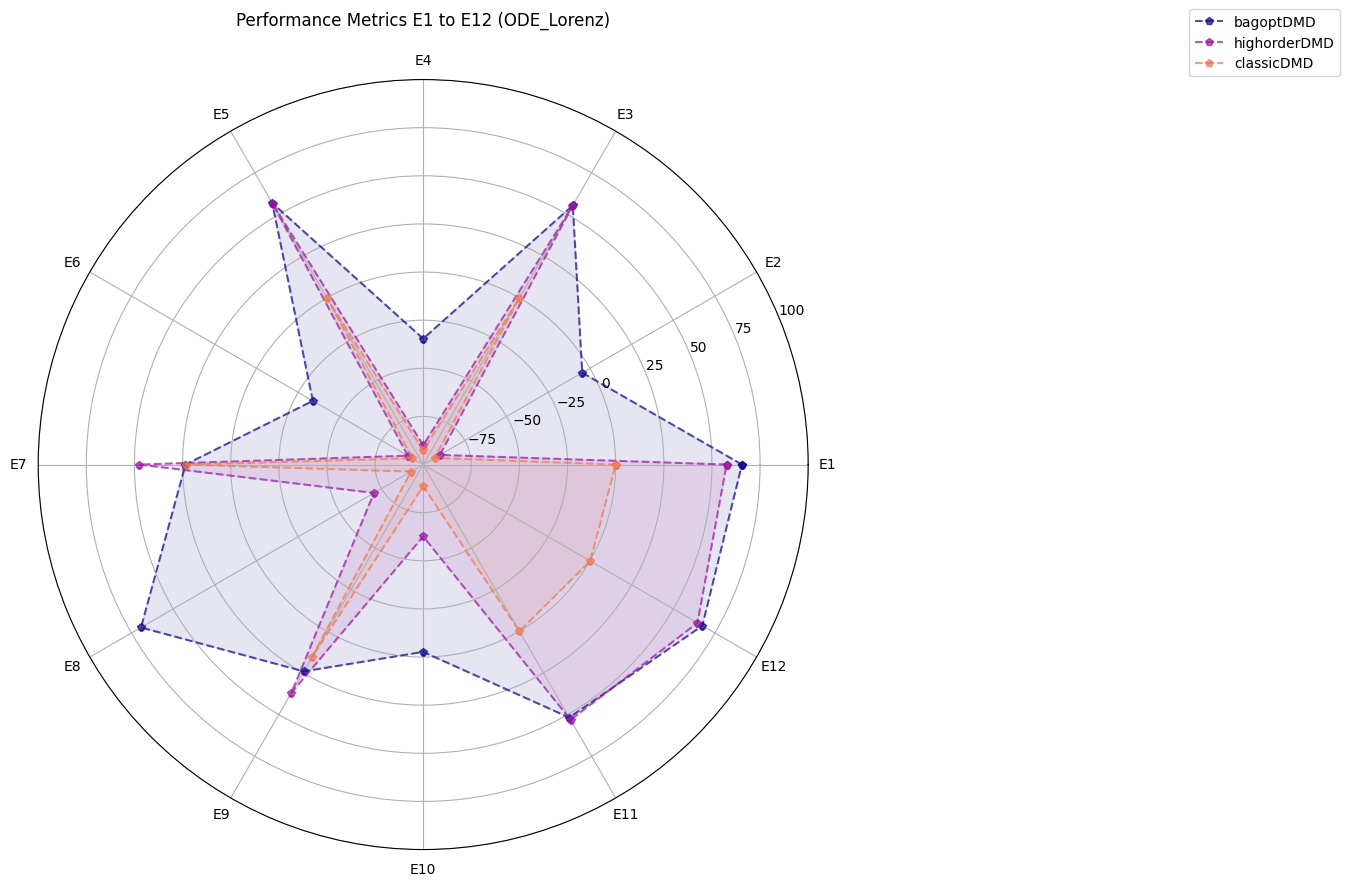

In [2]:
# Dataset name
dataset_name = "ODE_Lorenz"

# Dictionary to store results for all batches
results = {}

base_methods = [
    # 'CTF_NaiveBaselines_constant'
    ]
methods = [
    'bagoptDMD',
    'highorderDMD',
    'classicDMD',
           ]

all_methods = base_methods + methods

for method in all_methods:
    metric_values = get_metrics_from_best_configs(path_res, dataset_name, method)

    # Map values to E1, E2, ..., E12
    e_metrics = {f"E{i+1}": value for i, value in enumerate(metric_values)}
    
    # Store the transformed metrics with the batch path as the key
    results[method] = e_metrics

spider_plot(results, base_methods, methods, dataset_name)

## KS
Let us load the results

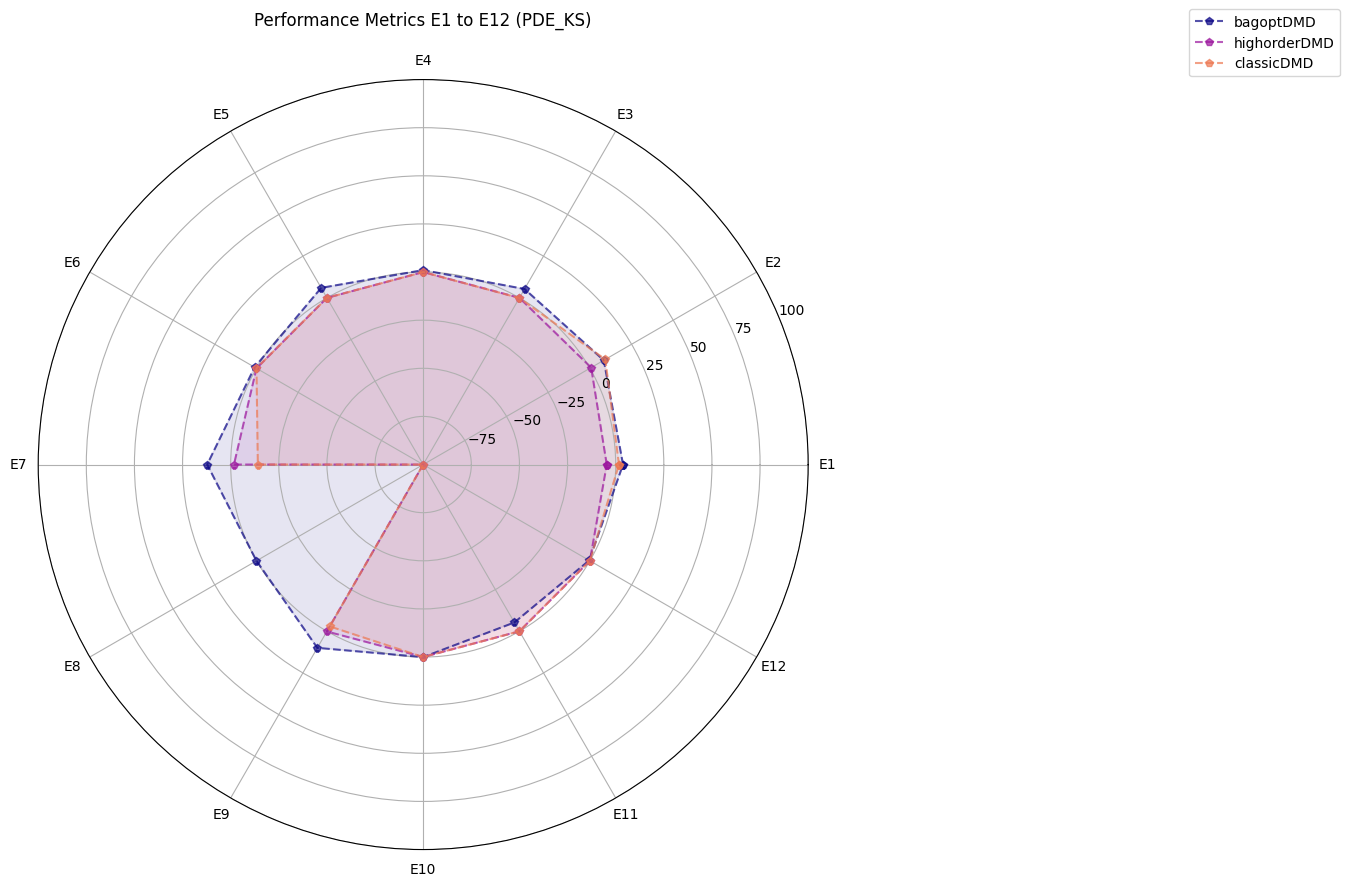

In [3]:
# Dataset name
dataset_name = "PDE_KS"

# Dictionary to store results for all batches
results = {}

base_methods = [
    # 'CTF_NaiveBaselines_constant'
    ]
methods = [
    'bagoptDMD',
    'highorderDMD',
    'classicDMD',
           ]

all_methods = base_methods + methods

for method in all_methods:
    metric_values = get_metrics_from_best_configs(path_res, dataset_name, method)

    # Map values to E1, E2, ..., E12
    e_metrics = {f"E{i+1}": value for i, value in enumerate(metric_values)}
    
    # Store the transformed metrics with the batch path as the key
    results[method] = e_metrics

spider_plot(results, base_methods, methods, dataset_name)